In [1]:
# ingest the data

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/train.csv')
df1 = pd.read_csv('data/test.csv')

In [5]:
df = pd.concat([df,df1])

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 1. How big is the data?

In [8]:
df.shape

(1309, 12)

### 2. How does the data look like?

In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,1039,NaN,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S
510,511,1.0,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
74,75,1.0,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
617,618,0.0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S


### 3. What is the data type of columns?

In [12]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 4. Are there any missing value?

In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### Conclusion
- Some of the column have missing data

### 5. How does data look like mathmatically?

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### 6. Are their duplicate values?

In [15]:
df.duplicated().sum()

0

In [17]:
categorical_cols = df.select_dtypes(include='object').columns

In [18]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
numerical_cols = df.select_dtypes(exclude='object').columns

In [20]:
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### 7. How is the correlation between columns?

In [22]:
df[numerical_cols].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [29]:
df[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


#### Conclusion
- Here is good relationship between Fare column and Survived column, passengers who paid more fare have more chance to survived

#### Handle categorical Name column

In [30]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [46]:
df['Title'] = df['Name'].str.split('.').str[0].str.split(',').str[1].str.strip()

In [47]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [48]:
df['Title'].isnull().sum()

0

In [49]:
new_title = {'Mr':'Mr', 'Miss':'Miss', 'Mrs':'Mrs', 'Master':'Kid', 'Rev':'Officer', 
             'Dr':'Officer', 'Col':'Officer', 'Mlle':'Miss', 'Major':'Officer', 'Ms':'Miss', 
            'Lady': 'Royalty', 'Sir':'Royalty', 'Mme':'Mrs', 'Don':'Royalty', 'Capt':'Officer',
            'the Countess':'Royalty', 'Jonkheer':'Royalty','Dona':'Royalty'}

In [50]:
df['Title'] = df['Title'].map(new_title)

In [51]:
df.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
252,1144,NaN,1,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C,Mr


In [52]:
df.drop('Name', axis=1, inplace=True)

In [53]:
df.drop('PassengerId', axis=1, inplace=True)

In [54]:
df.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
726,1.0,2,female,30.0,3,0,31027,21.0,NaN,S,Mrs


In [55]:
df['Title'].value_counts()/len(df['Title'])*100

Title
Mr         57.830405
Miss       20.168067
Mrs        15.126050
Kid         4.660046
Officer     1.757066
Royalty     0.458365
Name: count, dtype: float64

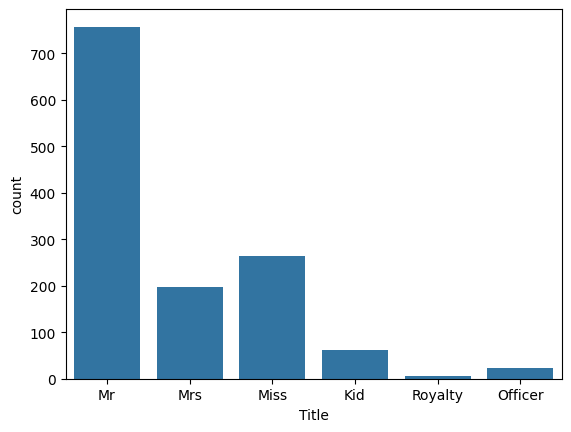

In [59]:
sns.countplot(data=df, x='Title')
plt.show()

<Axes: ylabel='count'>

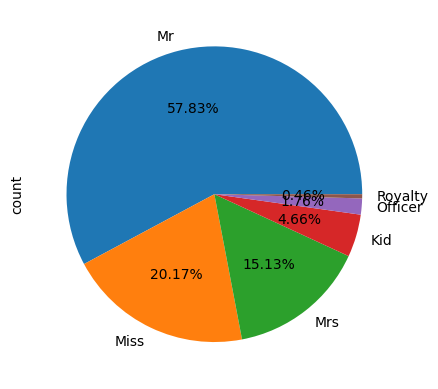

In [60]:
df['Title'].value_counts().plot(kind='pie', autopct='%.2f%%')

#### Conclusions 
- Divided 18 diffrent value counts into 6 value counts
- No Missing values
- Count of Mr is more than 50% 

#### Handle the categorial Sex Column

In [61]:
df['Sex'].isnull().sum()

0

In [62]:
df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

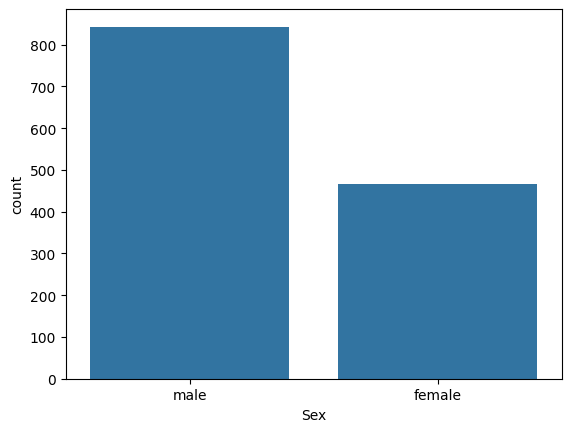

In [63]:
sns.countplot(data=df, x='Sex')

<Axes: ylabel='count'>

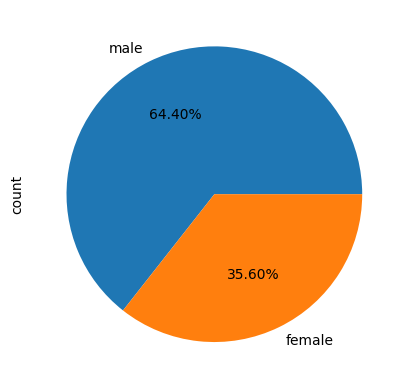

In [64]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%')

#### Conclusions
- Male is more than female, male 64.40% and female 35.60%
- No missing values in this column

#### Handle the categorial Embarked Column

In [67]:
df['Embarked'].isnull().sum()

2

In [68]:
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [69]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [71]:
# fillna with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [72]:
df['Embarked'].isnull().sum()

0

In [73]:
df['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

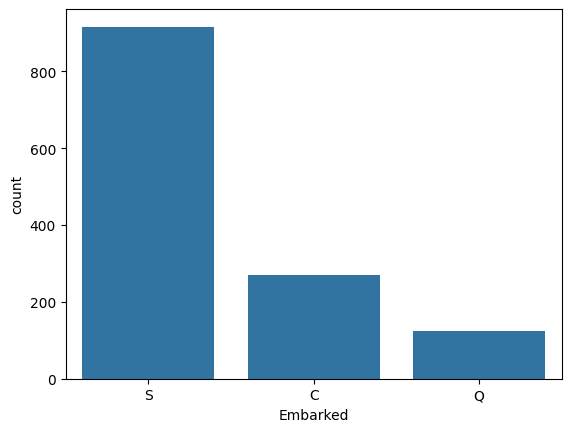

In [74]:
sns.countplot(data=df, x='Embarked')

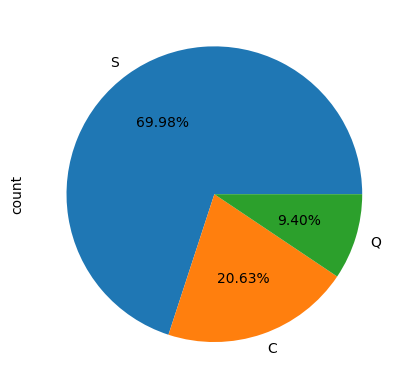

In [76]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

#### Insights
- Must of the passangers are from Southampton i.e 69.98%
- Two missing values is filled with mode
- S:Southampton, C:Cherbourg, and Q:Queenstown.

#### Handle categorial Cabin Column

In [78]:
df['Cabin'].isnull().sum()

1014